# One-Way ANOVA Test

**To check effect of age group on spending score**


   
     **Age Group Sample 1: 18-35**
     **Age Group Sample 2: 35-52** 

**Imports**

In [0]:
import seaborn as sns 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats


**Uploading Dataset**

In [0]:
from google.colab import files
uploaded = files.upload()


**Making Dataset**

In [0]:
mallData = pd.read_csv('Mall_Customers.csv')
mallData.columns
mallData.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

**Sampling Data**

In [0]:
maleMallData = pd.DataFrame()
femaleMallData = pd.DataFrame()

maleMallData = mallData.loc[mallData['Gender'] == 'Male']
maleMallData.columns
maleMallData.shape
maleMallData['Age'].describe()
maleMallData.drop(['CustomerID','Annual Income (k$)'], axis=1)

femaleMallData = mallData.loc[mallData['Gender'] == 'Female']
femaleMallData = femaleMallData.iloc[:88]
femaleMallData.columns
femaleMallData.shape
femaleMallData.drop(['CustomerID','Annual Income (k$)'], axis=1)

"adding age range column"
ageRangeList = []
ageRangeListFemale = []

for row in maleMallData['Age']:
    if (row >= 18) and (row < 35):
        ageRangeList.append(0)
    elif(row >= 35) and (row < 52):
        ageRangeList.append(1)
    elif(row >= 52) and (row <= 70):
        ageRangeList.append(2)
        
for row in femaleMallData['Age']:
    if (row >= 18) and (row < 35):
        ageRangeListFemale.append(0)
    elif(row >= 35) and (row < 52):
        ageRangeListFemale.append(1)
    elif(row >= 52) and (row <= 70):
        ageRangeListFemale.append(2)
        
maleMallData['AgeRange'] = np.array(ageRangeList)
femaleMallData['AgeRange'] = np.array(ageRangeListFemale)
maleMallData.dtypes
femaleMallData.dtypes
maleMallData.columns = ['CustomerID', 'Gender','Age', 'AnnualIncome', 'SpendingScore', 'AgeRange']
femaleMallData.columns = ['CustomerID', 'Gender','Age', 'AnnualIncome', 'SpendingScore', 'AgeRange']


"splitting male and female dataframes into seperate age groups" 
femaleMallData18to35 = femaleMallData.loc[femaleMallData['AgeRange'] == 0]
femaleMallData18to35.shape

femaleMallData35to52 = femaleMallData.loc[femaleMallData['AgeRange'] == 1]
femaleMallData35to52.shape

femaleMallData52to70 = femaleMallData.loc[femaleMallData['AgeRange'] == 2]
femaleMallData52to70.shape

maleMallData18to35 = maleMallData.loc[maleMallData['AgeRange'] == 0]
maleMallData18to35.shape

maleMallData35to52 = maleMallData.loc[maleMallData['AgeRange'] == 1]
maleMallData35to52.shape

maleMallData52to70 = maleMallData.loc[maleMallData['AgeRange'] == 2]
maleMallData52to70.shape

"Combining them to make two different data samples based on age group"
frames18to35 = [femaleMallData18to35, maleMallData18to35]
frames35to52 = [femaleMallData35to52, maleMallData35to52]

sample18to35 = pd.concat(frames18to35)
sample35to52 = pd.concat(frames35to52)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


**Data Exploration**

In [0]:
sample18to35.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,AgeRange
count,78.000000,78.000000,78.000000,78.000000,78.0
mean,91.089744,25.858974,56.871795,57.910256,0.0
std,58.525205,5.143965,27.921206,24.136078,0.0
min,1.000000,18.000000,15.000000,1.000000,0.0
25%,40.500000,21.000000,37.250000,43.000000,0.0
50%,93.500000,26.000000,59.500000,59.000000,0.0
75%,138.750000,31.000000,73.750000,75.000000,0.0
max,200.000000,34.000000,137.000000,97.000000,0.0


In [0]:
sample35to52.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,AgeRange
count,63.000000,63.000000,63.000000,63.000000,63.0
mean,95.492063,42.984127,57.317460,43.888889,1.0
std,51.496593,5.428396,21.042833,25.291916,0.0
min,7.000000,35.000000,18.000000,1.000000,1.0
25%,49.000000,38.000000,41.000000,26.000000,1.0
50%,97.000000,43.000000,60.000000,42.000000,1.0
75%,134.500000,48.000000,72.000000,55.500000,1.0
max,183.000000,51.000000,98.000000,99.000000,1.0


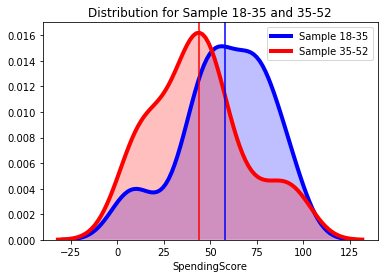

In [0]:
Sample1_2DistPlot = sns.distplot(sample18to35['SpendingScore'], label='Sample 18-35', hist=False, kde = True, color = 'blue', kde_kws={'shade': True, 'linewidth': 4})
Sample1_2DistPlot = sns.distplot(sample35to52['SpendingScore'], label='Sample 35-52',hist=False, kde = True, color = 'red', kde_kws={'shade': True, 'linewidth': 4})
Sample1_2DistPlot.set_title('Distribution for Sample 18-35 and 35-52')
Sample1_2DistPlot.axvline(57.910256, color='blue')
Sample1_2DistPlot.axvline(43.888889, color='red')

Text(0.5, 1.0, 'Sample 18-35 Age vs. Spending Score')

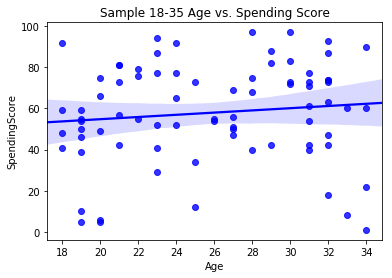

In [0]:
Sample1Scatter = sns.regplot(sample18to35['Age'], sample18to35['SpendingScore'], color='blue')
Sample1Scatter.set_title("Sample 18-35 Age vs. Spending Score")

Text(0.5, 1.0, 'Sample 35-52 Age vs. Spending Score')

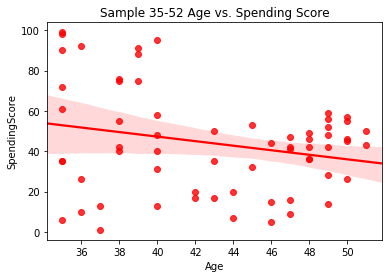

In [0]:
Sample2Scatter = sns.regplot(sample35to52['Age'], sample35to52['SpendingScore'], color='red')
Sample2Scatter.set_title("Sample 35-52 Age vs. Spending Score")

**ANOVA Test**

In [0]:
sample18to35 = sample18to35.drop(['Gender', 'CustomerID', 'Age', 'AnnualIncome'], axis=1)
sample35to52 = sample35to52.drop(['Gender', 'CustomerID', 'Age', 'AnnualIncome'], axis=1)
OneWayAnovaTestSpendingCoeff = stats.f_oneway(sample18to35, sample35to52)
OneWayAnovaTestSpendingCoeff

**CONCLUSION OF ANOVA TEST**

1.  Alpha Level chosen is 0.05
2. P-Value calculated is 0.00101695
3. Because P-value calculated was less than the Alpha Level, we reject the null hypothesis
4. In other words, the age group (18-35 and 35-52) does make a statistically significant difference on the spending score 


# Two-Way ANOVA Test

**IMPORTING PACKAGES**

install.packages("dplyr")

install.packages("ggpubr")

library(ggpubr)

library(dplyr)

library(ggplot2)


**READING AND EDITING DATA**

mallData <- read.csv("Mall_Customers.csv", header = TRUE)

mallData <- select(mallData,-c(CustomerID,Gender))

names(mallData) <- c("Age", "AnnualIncome", "SpendingScore")

mallData

**MAKING AGE RANGE COLUMN**

ageRangeList2 <- c(0,0,0,0,0,0,1,0,2,0,2,1,2,0,1,0,1,0,2,1,1,0,1,0,2,0,1,1,1,0,2,0,2,0,1,
                   0,1,2,0,1,1,2,1,0,2,2,1,2,1,0,2,1,2,1,2,0,1,1,1,2,1,2,1,2,1,0,2,0,2,1,
                   0,0,0,0,2,2,2,1,0,2,0,1,2,1,0,2,0,0,0,0,1,2,1,0,2,1,2,1,0,2,1,2,1,2,1,
                   1,2,1,2,1,1,1,1,0,0,0,2,1,2,1,2,1,2,0,2,1,2,0,0,1,1,2,1,0,1,0,0,2,1,2,
                   0,2,1,2,1,0,0,0,2,1,2,1,2,2,2,2,1,1,2,1,0,0,0,0,2,1,2,0,0,2,1,2,0,1,2,
                   1,2,1,2,1,2,2,2,0,0,0,1,2,1,0,2,2,1,2,0,1,0,2,0,1)

**ADDING AGE RANGE COLUMN TO DATA**

mallData$AgeRange <- ageRangeList2

**PLOTTING DATA**

ggplot(mallData, aes(x=AnnualIncome, y=SpendingScore, color=AgeRange)) + geom_point(shape=2)

**RUNNING 2-Way ANOVA Test**
res.aov2 <- aov(SpendingScore ~ AgeRange + AnnualIncome, data = mallData)
summary(res.aov2)